In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from get_plot import get_plot
from scipy import sparse
from shapely.geometry import Point, Polygon, LineString
import pandas as pd
import statistics
import plotly.express as px

coords = json.load(open('coords.json'))
mpl.rcParams['figure.dpi'] = 120
# mpl.rcParams['savefig.pad_inches'] = 0


# This code is processed 
# I have manually processed every file using this format

In [2]:
target_limit =  "limits_4326" 
xmin, xmax, ymin, ymax = (coords[target_limit]["xmin"]), (coords[target_limit]["xmax"]), (coords[target_limit]["ymin"]), (coords[target_limit]["ymax"])

In [40]:
fires = sparse.load_npz("Feux.npz").todense() ; feuillu = sparse.load_npz("N Foret Resineux.npz").todense()

In [ ]:
m1 = np.where((fires > 0), fires, 0) ; m2 = np.where((feuillu > 0), feuillu, 0)

In [22]:
def intersect_mat(mat1, mat2):
    m1 = np.where((mat1 > 0), mat1, 0)
    m2 = np.where((mat2 > 0), mat2, 0)

    mat_intersect = np.where((m1 == m2), m1, 0)
    return mat_intersect

In [36]:
fires.shape

(46080, 75438)

In [39]:
feuillu.shape

(46080, 73557)

In [ ]:
overlap / (fires.shape[0]*fires.shape[1])

In [44]:
overlap = 0

for i in range(fires.shape[0]):
    print(i)
    for j in range(fires.shape[1]):
        # print(fires[i, j])
        # print(j)

        if (fires[i, j] > 0 and feuillu[i, j] > 0):
            overlap+=1
    
    # break

0
1


KeyboardInterrupt: 

In [23]:
a = np.random.randint(low=0, high=2, size=(5, 5))
b = np.random.randint(low=0, high=2, size=(5, 5))

In [30]:
np.where((fires > 0), fires,  0)

ValueError: setting an array element with a sequence.

In [26]:
c = intersect_mat(fires, feuillu)

ValueError: setting an array element with a sequence.

In [25]:
c

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [4]:
fires.shape

(46080, 75438)

In [6]:
gdf = gdf.fillna('0')
gdf = gdf[gdf.an_origine.astype(int) >= 1900]
gdf = gdf.to_crs(4326)
bnds = gdf["geometry"].bounds

In [7]:
gdf_f = gdf_f.to_crs(4326)

In [16]:
gdf_f.columns.values

array(['hypso_l_', 'hypso_l_id', 'long_m', 'no_seq_ele', 'indicatif',
       'co_geomt', 'coloc1', 'coloc2', 'coloc3', 'co_manip', 'da_manip',
       'zmin', 'zmax', 'echelle', 'co_prodt', 'co_metad', 'no_seq_rat',
       'toponyme', 'descriptio', 'e00_anno_i', 'e00_text_l', 'e00_anno_n',
       'no_feuil', 'dat_acqui', 'dat_charg', 'oid', 'geometry'],
      dtype=object)

In [18]:
gdf_f["da_manip"]

0          2052007.0
1          2052007.0
2          2052007.0
3          2052007.0
4          2052007.0
             ...    
1772746    7022007.0
1772747    7022007.0
1772748    7022007.0
1772749    7022007.0
1772750    7022007.0
Name: da_manip, Length: 1772751, dtype: float64

(-80.4, -60.6, 44.6, 52.6)

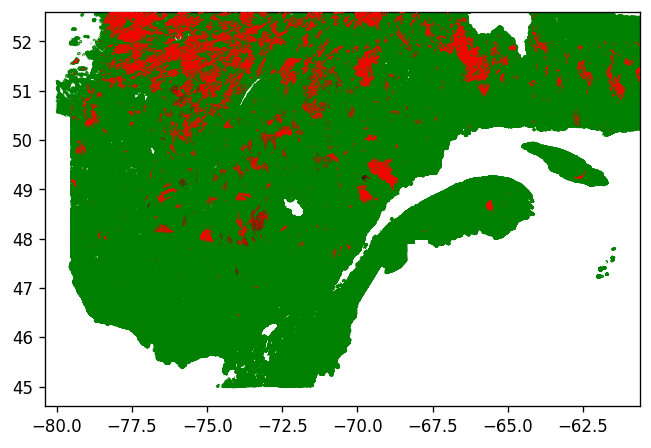

In [8]:
ax = gdf_f.plot(color="green", zorder=0)
gdf.plot(ax=ax, color="red", zorder=10)
ax.axis([
    xmin, xmax, ymin, ymax
])

(-79.0, -78.0, 51.0, 51.4)

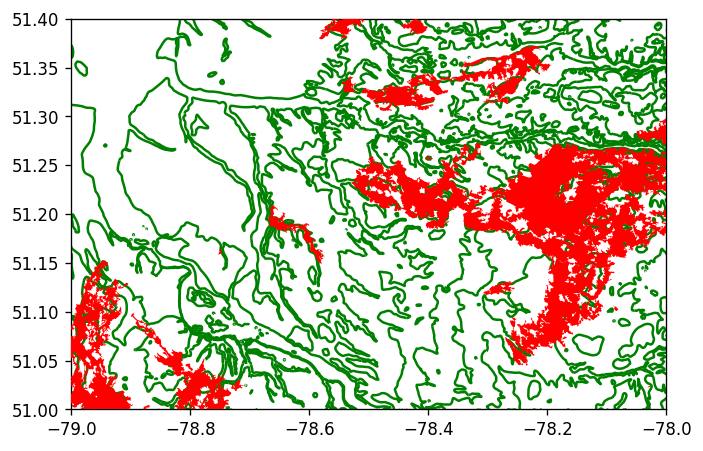

In [10]:
ax = gdf_f.plot(color="green", zorder=0)
gdf.plot(ax=ax, color="red", zorder=10)
ax.axis([-79, -78, 51, 51.4])

In [5]:
target_limit =  "limits_4326" #"limits_testing_9_chunks"
xmin, xmax, ymin, ymax = (coords[target_limit]["xmin"]), (coords[target_limit]["xmax"]), (coords[target_limit]["ymin"]), (coords[target_limit]["ymax"])

'''
where new_image is a figure.canvas.buffer_rgba() turned into a np matrix: 

nonzero_rows, nonzero_cols = np.nonzero(new_image) # Get all nonzero rows & collumns 

min_row, max_row = np.min(nonzero_rows), np.max(nonzero_rows)
min_col, max_col = np.min(nonzero_cols), np.max(nonzero_cols)
# After a series of test, (0, 575, 3, 764) was the exact fit of the canvas when the ration between width:height = 2:1

'''

min_row, max_row, min_col, max_col = 0, 575, 3, 764 
xyratio = 2/1

resx = 0.2
resy = resx/xyratio
n_chunkx = int(round((xmax-xmin)/resx, 1)) # MAKE SURE YOU CAN MATH: because we convert to int if you get 0.1232131 sketch 
n_chunky = int(round((ymax-ymin)/resy, 1)) # We're using round to not get like 2.9999999999999999997 make sure to get 0.3

# For Final Extraction: 
# x: 19.8/99 = 0.2 per chunk for 99 chunks
# y: 8/80 = 0.1 per chunk for 80 chunks

In [10]:
gdf2

geoc_fmj exercice origine an_origine perturb an_perturb  \
0       -542638,44+891642,20     2000      BR       2000       0          0   
1       -643830,30+485452,45     2000      BR       2000       0          0   
2       +173868,24+697820,37     2000      BR       2000       0          0   
3       -602121,43+549209,88     2000      BR       2000       0          0   
4       +351239,52+722405,16     2000      BR       2000       0          0   
...                      ...      ...     ...        ...     ...        ...   
73570  -691832,66+1216486,89     1998      BR       1998       0          0   
73571  -673527,97+1214035,62     1998      BR       1998       0          0   
73572  -681382,37+1216273,79     1998      BR       1998       0          0   
73573  -686238,39+1217078,07     1998      BR       1998       0          0   
73574  -673881,83+1215451,19     1998      BR       1998       0          0   

      part_str met_at_str  superficie  shape_length     shape_area  \
0            0       MAJP        77.9   7889.024636  768342.785601   
1            0       MAJP         1.2    631.224487   11965.221500   
2            0       MAJP        25.4   4564.586167  250635.701400   
3            0       MAJP         1.1    534.353529   11160.402850   
4            0       MAJP        32.0   3335.534767  316263.936250   
...        ...        ...         ...           ...            ...   
73570        0       MAJP         0.2    352.224085    1826.785300   
73571        0       MAJP         7.6   1484.885249   74753.942050   
73572        0       MAJP        15.9   2522.818864  156355.716700   
73573        0       MAJP        19.6   2076.544818  192884.124750   
73574        0       MAJP        10.3   1196.314581  101366.309600   

                                                geometry  
0      MULTIPOLYGON (((-76.43616 51.77256, -76.43612 ...  
1      MULTIPOLYGON (((-77.18131 48.01555, -77.18136 ...  
2      MULTIPOLYGON (((-66.04472 50.26413, -66.04469 ...  
3      MULTIPOLYGON (((-76.72326 48.63170, -76.72325 ...  
4      MULTIPOLYGON (((-63.51836 50.40434, -63.51832 ...  
...                                                  ...  
73570  MULTIPOLYGON (((-79.30015 54.50826, -79.30022 ...  
73571  MULTIPOLYGON (((-79.00758 54.51177, -79.00888 ...  
73572  MULTIPOLYGON (((-79.13305 54.52137, -79.13491 ...  
73573  MULTIPOLYGON (((-79.21575 54.51990, -79.21604 ...  
73574  MULTIPOLYGON (((-79.01825 54.52262, -79.01833 ...  

[57794 rows x 12 columns]

In [9]:
gdf2.an_origine.unique()

array(['2000', '2018', '1983', '1993', '2008', '2013', '2009', '2010',
       '2019', '1989', '2005', '2012', '2002', '1986', '1996', '1979',
       '1980', '2020', '1976', '1991', '2006', '2016', '1981', '1995',
       '2001', '2011', '2021', '1997', '2003', '1999', '1985', '2015',
       '1987', '2007', '2017', '1977', '1990', '1982', '1992', '2022',
       '1994', '1998', '2014', '1984', '1988', '2004', '1978'],
      dtype=object)

### Geopackage File Extraction per Fire

In [27]:
heights = []
widths = []

for idx, cur_row in gdf2.iterrows():
    
    cur_bnds = cur_row['geometry'].bounds
    width = cur_bnds[2]-cur_bnds[0]
    height = cur_bnds[3]-cur_bnds[1]
    widths.append(width)
    heights.append(height)

    # break

In [34]:
widths = np.array(widths)
heights = np.array(heights)
widths.sort()
heights.sort()

In [35]:
statistics.median(widths), statistics.median(heights)

(0.0036705512245731597, 0.00263702681059641)

In [47]:
statistics.mean(widths), statistics.mean(heights)

(0.01218216636924414, 0.007656604746662264)

In [37]:
np.histogram(widths)

(array([57153,   451,   109,    45,    18,     6,     4,     3,     3,
            2], dtype=int64),
 array([3.05832476e-06, 1.62558644e-01, 3.25114230e-01, 4.87669816e-01,
        6.50225402e-01, 8.12780988e-01, 9.75336574e-01, 1.13789216e+00,
        1.30044775e+00, 1.46300333e+00, 1.62555892e+00]))

(array([25108., 14498.,  8851.,  4560.,  2317.,  1311.,   443.,   247.,
          145.]),
 array([0.     , 0.00315, 0.00625, 0.0125 , 0.025  , 0.05   , 0.1    ,
        0.15   , 0.2    , 0.25   ]),
 <BarContainer object of 9 artists>)

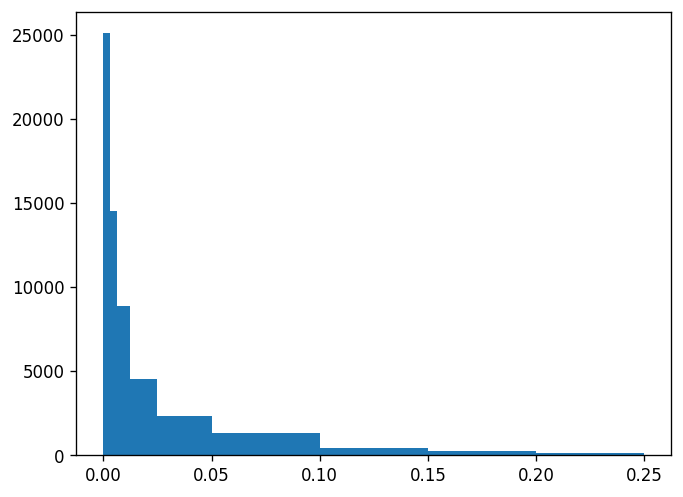

In [45]:
plt.hist(widths, bins=[0, 0.00315, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25])

<BarContainer object of 57794 artists>

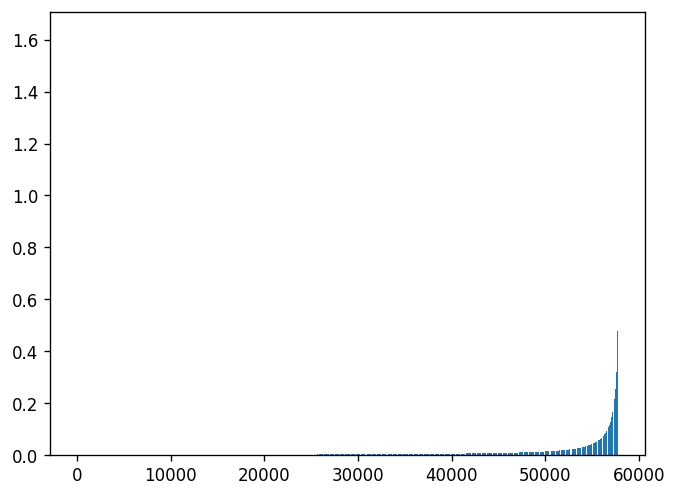

In [36]:
plt.bar(np.arange(len(widths)), widths)

{'whiskers': [<matplotlib.lines.Line2D at 0x1999950dcf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1999950e110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1999950da50>],
 'medians': [<matplotlib.lines.Line2D at 0x1999950e650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1999950e8f0>],
 'means': []}

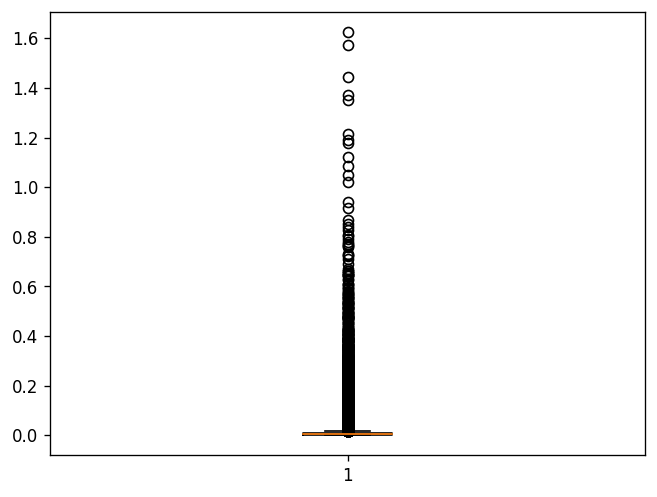

In [52]:
plt.boxplot(widths)

In [59]:
fig = px.box(widths)
fig.show(renderer="vscode")

In [54]:
px.bar(widths)

In [99]:
count = 0

fires = []

for idx, cur_row in gdf2.iterrows():
    # print("hi")
    print(idx)

    if (idx < 70544):
        continue

    y_factor = 10

    x_min, x_max, y_min, y_max = int(bnds["minx"][idx]), int(bnds["maxx"][idx]), int(bnds["miny"][idx]), int(bnds["maxy"][idx])
    # These coords only have 5 digits vs 7 for x and 6 digits vs 7 for y... or not let's manually fix this 
    
    
    # print(x_min, x_max, y_min, y_max)
    # # print(left_x_min, left_x_max,  top_y_min, top_y_max)
    # print(xmin, xmax, ymin, ymax)

    # if (count > 20):
    #     break
    # count+=1

    if (x_min < xmin or x_max > xmax or y_min < ymin or y_max > ymax):
        print("out of bounds")
        continue 

    fig, ax = plt.subplots(facecolor=(0, 0, 0, 0))
    gpd.GeoSeries(cur_row['geometry']).plot(ax=ax, color="white")
    ax.set_axis_off()
    ax.set_facecolor((0, 0, 0, 0))
    # Plot the fire into a sparse matrix 
    sparse_mat = sparse.csr_matrix((y_total, x_total)).tolil()
    # print(sparse_mat.shape)

    # We first render the required chunks

    left_x_min = xmin + (x_min-xmin) - ((x_min-xmin) % chunk_x)
    left_x_max = xmin + (x_max-xmin) - ((x_max-xmin) % chunk_x)
    top_y_min = ymin + (y_min-ymin) - ((y_min-ymin) % chunk_y)
    top_y_max = ymin + (y_max-ymin) - ((y_max-ymin) % chunk_y)

    # left_x_min /= 100
    # left_x_max /= 100
    # top_y_min /= y_factor
    # top_y_max /= y_factor

    # print((x_min-xmin))
    # print(chunk_x)
    # print((x_min-xmin) % chunk_x)
    # print(left_x_min, left_x_max,  top_y_min, top_y_max)

    for x in range(int((left_x_max - left_x_min)/chunk_x)+1):
        for y in range(int((top_y_min - top_y_max)/chunk_y)+1):
            ax.axis([
                left_x_min+x*chunk_x, 
                left_x_min+(x+1)*chunk_x, 
                top_y_min+y*chunk_y,
                top_y_min+(y+1)*chunk_y,
            ])

            fig.canvas.draw()

            X = np.array(fig.canvas.renderer.buffer_rgba())
            # X_final = np.zeros((len(X), len(X[0])))

            for row in range(108, 472):
                for col in range(95, 692):
                    # print(left_x_min+(x*chunk_x)*100)

                    # print(int(((top_y_min+(y*chunk_y))*10-ymin)*y_ratio)+col-108,int(((left_x_min+(x*chunk_x))*100-xmin)*x_ratio)+row-95)
                    sparse_mat[int(((top_y_min+(y*chunk_y))-ymin)*y_ratio)+row-108,int(((left_x_min+(x*chunk_x))-xmin)*x_ratio)+col-95] = (float(X[row][col][3]))/255.0
                    # X_final[row][col] = (float(X[row][col][3]))/255.0
            # X_final = X_final[108:472, 95:692]

            # print(X_final.shape)
    
    sparse_mat = sparse_mat.tocsr()

    sparse.save_npz("../fires/"+cur_row['an_origine']+"/"+str(idx)+".npz", sparse_mat) # File save path

    # fires.append(sparse_mat)
    del sparse_mat, fig, ax
    

    

97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117


C:\Users\xubil\AppData\Local\Temp\ipykernel_35040\2744083115.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(facecolor=(0, 0, 0, 0))


118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
260
261
262
263
264
265
266
267
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
473
474
475
476
477
478
479
480
481
482
483
484
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
674
out of bounds
675
676
677
678
679
680
681
682
683
684
685
686
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
897
898
899
900
901
902
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
99

### Verify if fires were extracted correctly

(36400, 59700)
[40059 40060 40061 40062 40063 40064]
(36400, 59700)
[27304 27305 27306 27307 27308 27309 27310 27311 27312 27313 27314 27315
 27316 27317 27318 27319 27320]
(36400, 59700)
[27610 27611 27612 27613 27614 27615 27616 27617 27618 27619 27620 27621
 27622 27623 27624 27625 27626 27627]
(36400, 59700)
[27299 27300 27301 27302 27303 27304 27305 27306]
(36400, 59700)
[27437 27438 27439 27440 27441 27442 27443 27444 27445 27446 27447 27448
 27449 27450]
(36400, 59700)
[27684 27685 27686 27687 27688 27689 27690 27691 27692 27693 27694 27695
 27696 27697 27698 27699 27700 27701 27702 27703]
(36400, 59700)
[57591 57592 57593 57594 57595 57596 57597 57598 57599 57600 57601 57602
 57603 57604 57605 57606 57607 57608 57609 57610 57611]
(36400, 59700)
[57629 57630 57631 57632 57633 57634 57635 57636 57637 57638 57639 57640
 57641 57642 57643 57644 57645 57646 57647 57648 57649 57650 57651 57652]
(36400, 59700)
[57601 57602 57603 57604 57605 57606 57607 57608 57609 57610 57611 57612
 5

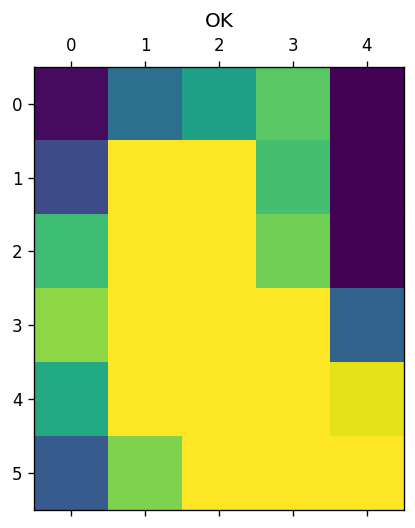

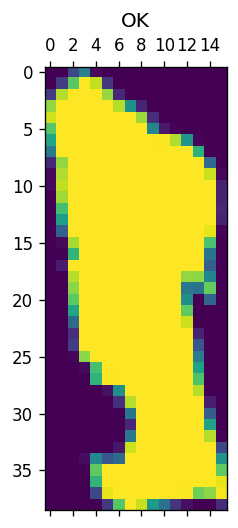

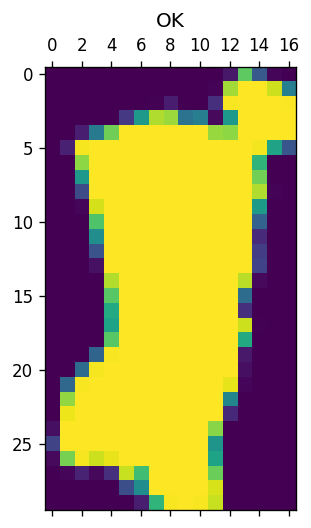

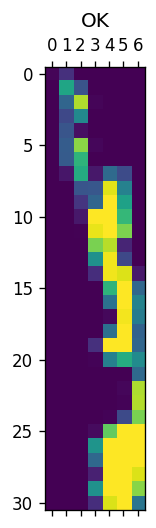

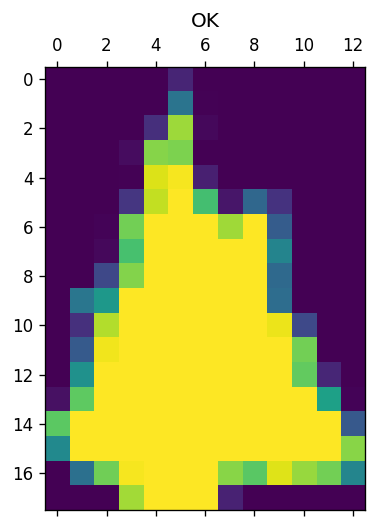

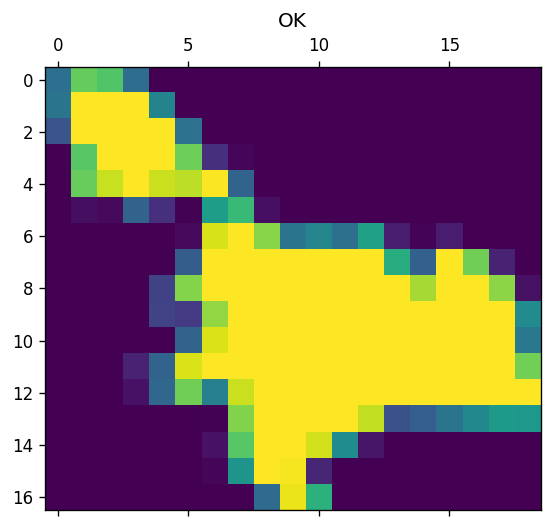

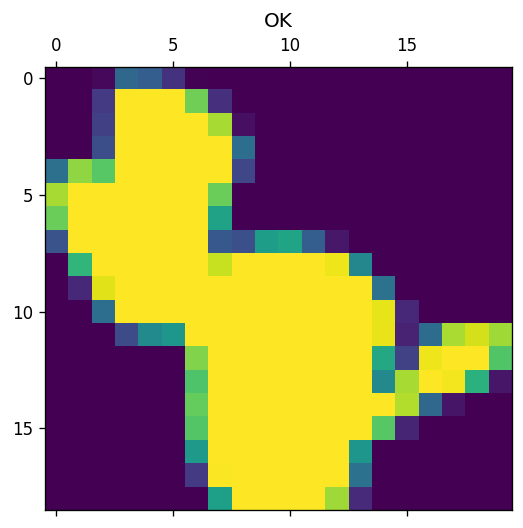

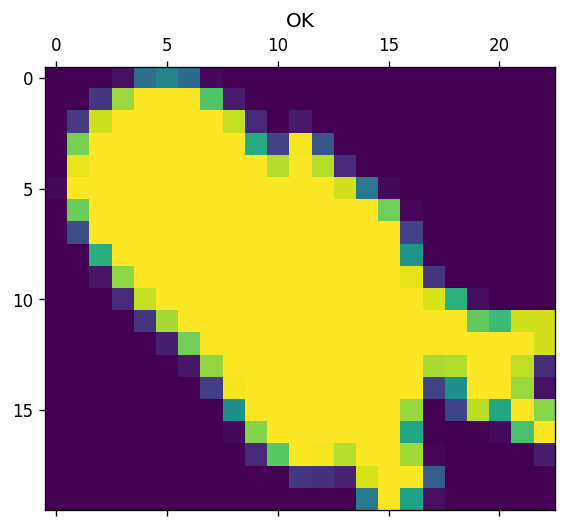

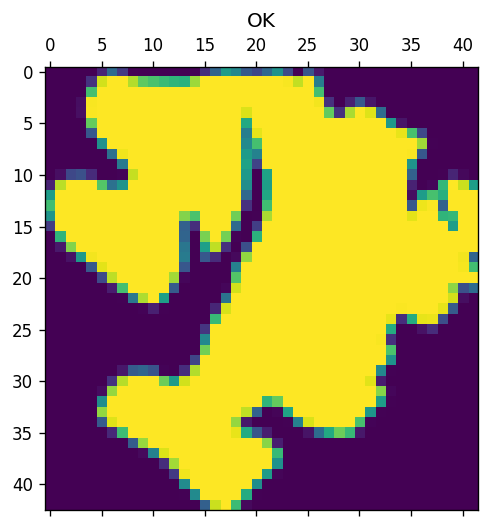

In [98]:
for fire in fires:
    data = fire.tocsr()
    print(data.shape)
    nnz_per_row  = fire.getnnz(axis=1)
    zoom = np.where(nnz_per_row > 0)[0]
    nnz_per_row_x  = fire.getnnz(axis=0)
    zoom_x = np.where(nnz_per_row_x > 0)[0]
    print(zoom_x)
    data = fire.tocsr()[zoom[0]:zoom[len(zoom)-1], zoom_x[0]:zoom_x[len(zoom_x)-1]]

    # N, M = data.shape
    # s, t = 400, 400           # decimation factors for y and x directions
    # T = sparse.csc_matrix((np.ones((M,)), np.arange(M), np.r_[np.arange(0, M, t), M]), (M, (M-1) // t + 1))
    # S = sparse.csr_matrix((np.ones((N,)), np.arange(N), np.r_[np.arange(0, N, s), N]), ((N-1) // s + 1, N))
    # result = S @ data @ T     # downsample by binning into s x t rectangles
    # result = result.todense() # ready for plotting
    

    figx, axX = plt.subplots()
    axX.set_title("OK")
    axX.matshow(data.todense())
    # axX.matshow(result)